### 1. 유방암 데이터를 활용하여 Ensemble 모델을 학습 해보자
- wisconsin의 유방암 데이터 셋
- 총 569건의 데이터(악성-212, 양성-357)

In [1]:
# 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data

# 데이터 형태 : 전체적인 형태 - 딕셔너리 구조, bunch 객체

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
# 딕셔너리 구조에서 데이터 확인 : 키 값 확인
# keys()
cancer_data.keys()

#data:(필수값) 문제 데이터, X, 독립변수, 설명변수, 피처(feature), 특성
#target : (필수값) 답 데이터, y, 종속변수, 결과, 실제적 답, target 
#feature_names : (옵션값) 문제 데이터 이름 리스트(컬럼명 리스트)
#target_names : (옵션값) 답 데이터 이름 리스트

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# 이스캐이프 코드가 적용되지 않은 형태로 되어있을 경우,
# print를 사용하면 정리된 형태로 출력할 수 있다.
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 분류에 사용할 특성 확인
# len()
print(cancer_data['feature_names'])
print(len(cancer_data['feature_names']))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [5]:
# 각 특성들의 자료형 확인 : type
print('유방암 데이터의 자료형 : ', type(cancer_data.data))

유방암 데이터의 자료형 :  <class 'numpy.ndarray'>


In [6]:
# 유방암 데이터 셋의 크기 확인 : shape
cancer_data.data.shape

(569, 30)

In [7]:
# 양성(357)과 악성(212) 데이터 수 확인
# 정답 레이블(클래스)의 이름 --> cancer_data.target_names
# 클래스별(범주별) 개수를 반환 --> bincount()  - numpy 에 있는 함수
# 동일한 개수로 이루어진 2개 이상의 데이터를 연결하는 함수 --> zip()
# zip() --> 약성 : 00명, 양성 : 00명

import numpy as np
# zip 이라는 함수를 이용해서 악성, 양성 구분
# np.bincount(cancer_data.target) : target개수를 반환
for i,j in zip(cancer_data.target_names, np.bincount(cancer_data.target)) :
    print({i:j})


{'malignant': 212}
{'benign': 357}


### 2. 훈련데이터와 테스트데이터로 분리

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 7:3
# random_state = 10

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,cancer_data.target,test_size=0.3, random_state=10)

In [10]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [11]:
X_train

array([[1.240e+01, 1.768e+01, 8.147e+01, ..., 7.370e-02, 2.556e-01,
        9.359e-02],
       [1.955e+01, 2.321e+01, 1.289e+02, ..., 1.825e-01, 2.576e-01,
        7.602e-02],
       [1.305e+01, 1.384e+01, 8.271e+01, ..., 3.532e-02, 2.107e-01,
        6.580e-02],
       ...,
       [1.234e+01, 1.227e+01, 7.894e+01, ..., 1.070e-01, 3.110e-01,
        7.592e-02],
       [1.385e+01, 1.721e+01, 8.844e+01, ..., 5.104e-02, 2.364e-01,
        7.182e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

### 3. RandomForest 모델 적용하기 
- n_estimators : 몇 개의 트리를 만들지 선택 ==> 100개
- random_state = 10
- max_features : 선택할 특징의 최대 수(0.3 : 30% ~ 0.7 : 70%)
    - 0 : 특성을 사용하지 않겠다.
    - 1 : 전체 특성을 사용하겠다.
    - max features 의 값을 늘리는 경우 : 개별트리가 적을 때, 특성들을 많이 사용하기 위해
    - max features 의 값을 줄이는 경우 : 개별트리가 많을 때, 과대적합을 방지 하기 위해

In [12]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 하이퍼 파라미터 튜닝
forest_model = RandomForestClassifier(n_estimators=100, random_state=10)

# 학습
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [13]:
# 교차검증으로 평가
from sklearn.model_selection import cross_val_score

cross_val_score(forest_model, X_train, y_train, cv=5).mean()

0.959746835443038

In [14]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = forest_model.predict(X_train)
test_pred = forest_model.predict(X_test)

In [15]:
# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

In [16]:
# 학습 및 테스트 데이터에 대한 분류모델의 성능(평균 정확도) 확인
from sklearn.metrics import accuracy_score
# {:.3f} 평균값을 소수 3자리 까지만 나타낸다.

print('학습 데이터 정확도를 이용한 예측 결과 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 데이터 정확도를 이용한 예측 결과 : {:.3f}'.format(accuracy_score(y_test, test_pred)))


학습 데이터 정확도를 이용한 예측 결과 : 1.000
테스트 데이터 정확도를 이용한 예측 결과 : 0.982


### GridSearchCV를 적용하여 모델 성능 향상


In [18]:
# GridSearchCV 불러오
from sklearn.model_selection import GridSearchCV

# 1. 튜닝할 하이퍼파라미터 설정
param = {'n_estimators' : [50, 150, 250, 350, 450, 1000], #나무 개수
         'max_depth' : [5, 7, 9, 11, 15, 20], #나무 최대 깊이
         'max_leaf_nodes' : [3, 5, 7], #최대 리프 노드 수
         'min_samples_split' : [20,40,60]} #노드 분할을 위한 최소 샘플 수

# 2. 랜덤 포레스트 모델 생성
forest_model1 = RandomForestClassifier(random_state=10, n_jobs=-1)
# n_jobs = -1 : 내컴퓨터의 SPU성능을 모두 쓰겠다.

# 3. GridSearchCV 모델 생성
grid = GridSearchCV(forest_model1, param, cv=5, scoring = 'accuracy', n_jobs=-1)

# 4. grid 모델 학습
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 15, 20],
                         'max_leaf_nodes': [3, 5, 7],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [50, 150, 250, 350, 450, 1000]},
             scoring='accuracy')

In [19]:
# 최적의 하이퍼파라미터 조합, 성능 확인하기
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_split': 20, 'n_estimators': 250}
0.952246835443038


### 모델 완성 및 영향력이 높은 특성 확인

In [20]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 랜덤포레스트 모델 완성하기
best_model = RandomForestClassifier(max_depth=5,
                                    max_leaf_nodes=5, 
                                    min_samples_split=20,
                                    n_estimators=250,
                                    random_state=10)
# 학습
best_model.fit(X_train, y_train)

#영향력 높은 특성 추출하기 => feature_importances_
features = best_model.feature_importances_
print('features \n', features)

features 
 [0.05942792 0.01367833 0.04993233 0.06968792 0.0034099  0.00420376
 0.03464259 0.09981001 0.00051944 0.00153434 0.01065286 0.00164311
 0.01666181 0.01490827 0.00073188 0.00183005 0.00495588 0.0029583
 0.00080241 0.00107266 0.09794514 0.00682579 0.11861533 0.15187619
 0.0100358  0.01235186 0.0253058  0.17016027 0.00609332 0.00772673]


In [29]:
#영향력이 높은 특성들을 데이터 프레임으로 만들기
df = pd.DataFrame(features, index=cancer_data.feature_names, columns=['importances'])
# 특성의 중요도 값 순위로 정렬(내림차순)
df1 = df.sort_values(by='importances', ascending=False)

<Axes: >

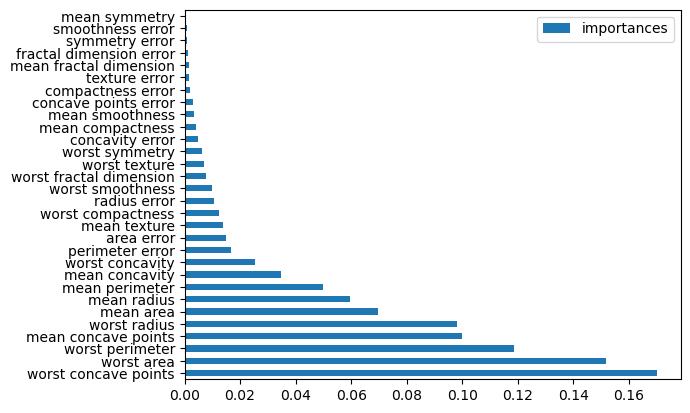

In [31]:
# DataFrame.plot.barh()함수를 이용한 시각화
df1.plot.barh()

In [32]:
# feature_importances_를 이용하여 영향력 높은 특성 확인
# 특성 중요도를 시각화 함수 정의

# columns: 특성(변수)들의 이름을 포함하는 리스트 또는 배열.
# features: 특성들의 중요도를 나타내는 리스트 또는 배열.
# num: 표시할 특성 중요도의 개수.

def plot_feature_importance(columns, features, num) :
    # 축 번호별로 중요도 그래프를 그림
    plt.barh(range(num), features)
    # 축 번호에 축 이름을 출력
    plt.yticks(np.arange(num), columns)
    plt.xlabel('features importances')
    plt.ylabel('feature')
    plt.ylim(-1, num)
    plt.show()

In [35]:
df1.iloc[:7].shape[0]

7

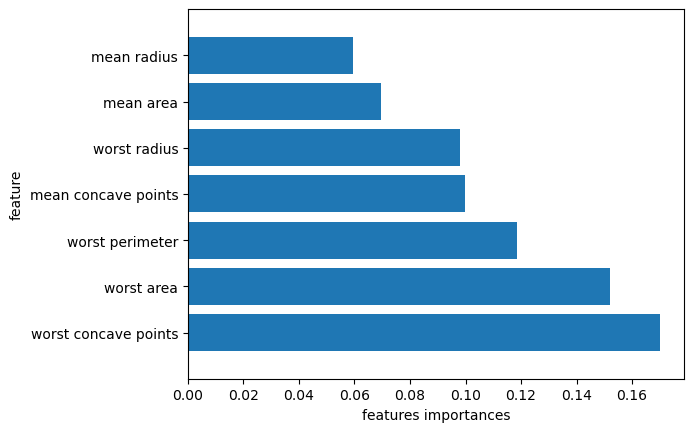

In [37]:
plot_feature_importance(df1.index[:7], df1.iloc[:7,0], df1.iloc[:7].shape[0])

### AdaBoost 모델 적용하기
- 결정트리 기반의 모델이지만, 각각의 트리들이 독립적으로 존재하지 않음
- 사전 가지치기 파라미터들을 사용할 수 없다.
- 이전 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킨다.
- n_estimators : 사용할 결정크리의 갯수
- learning_rate(학습률) : 가중치 갱신에 변동폭을 조정, 0~1 사이의 값, 기본값 1
    - 값이 크면 '과대적합'
    - 값이 작으면 '과소적합'

In [39]:
# AdaBoost 불러오기
from sklearn.ensemble import AdaBoostClassifier

# 모델 생성 및 하이퍼파라미터 설정
ada_model = AdaBoostClassifier(n_estimators = 50, random_state = 10)

# 학습
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [40]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

### GBM 모델 적용하기
- 여러개의 결정트리를 묶어서 강력한 모델을 만드는 앙상블방법
- 강력한 사전 가지치기 적용(max_depth의 기본값 : 3)
- 예측 성능은 높지만 과대적합이 빠르게 되고, 시간이 오래 걸린다.
- max_depth를 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 해야 한다.
- 가중치를 계산할 때 경사하강법을 사용한다.

In [42]:
#GBM 모델 불러오기
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성 및 하이퍼파라미터 설정(X)
gbm_model = GradientBoostingClassifier(random_state = 10)

#학습
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [43]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = gbm_model.predict(X_train)
test_pred = gbm_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

### XGBoost 모델 적용하기
- 결정트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘(모델)의 하나
- 분류에 있어서 일반적으로 다른 머신러닝 모델보다 뛰어난 성능을 나타낸다.
- GBM 기반이지만 GBM의 단점을 해결
    - 느린 학습시간 ==> Early Stopping 기능으로 해결
    - 과대적합 ==> 과대적합을 방지하는 규제를 포함
- 대규모 머신러닝 문제에서 GBM을 적용하는 경우 ==> XGBoost 를 사용

In [44]:
# sklearn에서 제공하지 않는 모듈
# XGBoost 패키지 설치
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.6 MB/s eta 0:00:00


In [45]:
# XGBoost 불러오기
from xgboost import XGBClassifier

# 모델생성 및 하이퍼파라미터 설정(X) 기본값으로만 해보자!
xgb_model = XGBClassifier(random_state=10)

# 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [46]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

### Light GBM 적용하기
- XGBoost에 비해 가벼워 속도가 빠른 모델
- 비대칭 (수직) 트리분할로 균형을 맞추지 않는다. ==> 속도가 빠르다.
- 학습을 반복할수록 균형트리보다 예측 오류의 손실 최소화
- 깊이가 깊은 비대칭트리 생성 ==> 과적합이 쉽다.

In [48]:
# Light GBM 패키지 설치하기
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 27.6 MB/s eta 0:00:00


In [49]:
# Light GBM 불러오기
import lightgbm

In [50]:
from lightgbm.sklearn import LGBMClassifier

In [52]:
# 모델 생성 및 하이퍼파라미터 설정(X)
lgbm_model= LGBMClassifier(random_state=10)

# 학습
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 245, number of negative: 153
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615578 -> initscore=0.470820
[LightGBM] [Info] Start training from score 0.470820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(random_state=10)

In [53]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = lgbm_model.predict(X_train)
test_pred = lgbm_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1